In [3]:
import pandas as pd
import numpy as np

In [120]:

def calculateIntegral(fun, a: float, b: float, degree: int, exact_value: float = 0.0,max_diff:float =0.0 , n: int = 1000):
    """
    Метод симметричных прямоугольников
    :param fun: Функция от которой необходимо вычислить,  вид а y = m*x^degree
    :param a: Верхний предел интегрирования
    :param b: Нижний предел
    :param n: Количество разбиений
    :param degree: Степень при функции
    :param exact_value: Точное значение интеграла
    :param max_diff: максимальное значение дифиринцируемой функции
    :return: возвращает массив нампай с данными
    """
    array_sum = []
    deltaRunge = [0]
    deltaK = [0, 0]
    n_count =[n]
    delta_exact =[]
    delta_teorhy =[]

    while True:
        h = (b - a) / n
        x = [(i * h + a) for i in range(n+1)]
        M4 = (b - a) * max_diff
        sumH = fun(a, degree) + fun(b, degree)
    
        for i in range(1, n ):
            sumH += 2*fun(x[i], degree)
        for i in range(n ):
            sumH += 4 * fun(x[i] + h / 2, degree)
        
        array_sum.append(sumH*h/6)
        delta_exact.append(exact_value - sumH*h/6)
        delta_teorhy.append((M4/2880)*h**4)
        if len(array_sum) > 1:
            deltaRunge.append((array_sum[-1] - array_sum[-2]) / (2 ** 4 - 1))
        if len(array_sum) > 2:
            deltaK.append((array_sum[-2] - array_sum[-3])/(array_sum[-1] - array_sum[-2]))
        else:
            n = 2 * n
            n_count.append(n)
            continue
        if not abs(deltaRunge[-1]) <= 10 ** -16 and n <= 70000:
            n = 2 * n
            n_count.append(n)
            continue
        if exact_value != 0.0:
            return np.array([n_count, deltaK,delta_exact, deltaRunge, delta_teorhy, array_sum])
        else:
            return np.array([n_count, deltaK, array_sum])

In [123]:
data = calculateIntegral(lambda x, m: 6*x ** m, a=0, b=1, degree=5, n=1 , exact_value=1, max_diff=720).transpose()

In [124]:
df = pd.DataFrame(data, columns=['Count divides', 'deltaK', 'delta exact', 'delta Runge', 'delta teorhy', 'sum'])

In [125]:
df

,Count divides,deltaK,delta exact,delta Runge,delta teorhy,sum
0,1.0,0.000000,-1.250000e-01,0.000000e+00,2.500000e-01,1.125000
1,2.0,0.000000,-7.812500e-03,-7.812500e-03,1.562500e-02,1.007812
2,4.0,16.000000,-4.882812e-04,-4.882812e-04,9.765625e-04,1.000488
3,8.0,16.000000,-3.051758e-05,-3.051758e-05,6.103516e-05,1.000031
4,16.0,16.000000,-1.907349e-06,-1.907349e-06,3.814697e-06,1.000002
5,32.0,16.000000,-1.192093e-07,-1.192093e-07,2.384186e-07,1.000000
6,64.0,16.000000,-7.450581e-09,-7.450581e-09,1.490116e-08,1.000000
7,128.0,16.000000,-4.656613e-10,-4.656613e-10,9.313226e-10,1.000000
8,256.0,16.000000,-2.910383e-11,-2.910383e-11,5.820766e-11,1.000000
9,512.0,16.000130,-1.819211e-12,-1.818975e-12,3.637979e-12,1.000000


In [126]:
data = calculateIntegral(lambda x, m: x ** m, a=0, b=2, degree=4, n=1 , exact_value=6.4, max_diff =24 ).transpose()
df = pd.DataFrame(data, columns=['Count divides', 'deltaK', 'delta exact', 'delta Runge', 'delta teorhy', 'sum'])
df

,Count divides,deltaK,delta exact,delta Runge,delta teorhy,sum
0,1.0,0.000000,-2.666667e-01,0.000000e+00,2.666667e-01,6.666667
1,2.0,0.000000,-1.666667e-02,-1.666667e-02,1.666667e-02,6.416667
2,4.0,16.000000,-1.041667e-03,-1.041667e-03,1.041667e-03,6.401042
3,8.0,16.000000,-6.510417e-05,-6.510417e-05,6.510417e-05,6.400065
4,16.0,16.000000,-4.069010e-06,-4.069010e-06,4.069010e-06,6.400004
5,32.0,16.000000,-2.543132e-07,-2.543132e-07,2.543132e-07,6.400000
6,64.0,16.000000,-1.589457e-08,-1.589457e-08,1.589457e-08,6.400000
7,128.0,16.000000,-9.934107e-10,-9.934107e-10,9.934107e-10,6.400000
8,256.0,16.000000,-6.208811e-11,-6.208817e-11,6.208817e-11,6.400000
9,512.0,16.000000,-3.880452e-12,-3.880511e-12,3.880511e-12,6.400000


In [127]:
data = calculateIntegral(lambda x, m: x**(1/m) * (1 + x**2)**(1/2), a=0, b=1.5, degree=11, n=1).transpose()
df = pd.DataFrame(data, columns=['Count divides', 'deltaK',  'sum'])
df

,Count divides,deltaK,sum
0,1.0,0.000000,1.685349
1,2.0,0.000000,1.787389
2,4.0,2.116899,1.835592
3,8.0,2.133559,1.858185
4,16.0,2.130881,1.868787
5,32.0,2.130265,1.873764
6,64.0,2.130126,1.876101
7,128.0,2.130093,1.877198
8,256.0,2.130085,1.877713
9,512.0,2.130083,1.877954


In [128]:
data = calculateIntegral(lambda x, m: x**(1/m) * (1 + x**2)**(1/2), a=0.001, b=1.5, degree=11, n=1).transpose()
df = pd.DataFrame(data, columns=['Count divides', 'deltaK',  'sum'])
df

,Count divides,deltaK,sum
0,1.0,0.000000,1.817920
1,2.0,0.000000,1.853273
2,4.0,2.374880,1.868158
3,8.0,2.498375,1.874117
4,16.0,2.582961,1.876423
5,32.0,2.718087,1.877272
6,64.0,2.929051,1.877562
7,128.0,3.270080,1.877650
8,256.0,3.843844,1.877674
9,512.0,4.832177,1.877678


In [97]:
import matplotlib.pyplot as plt


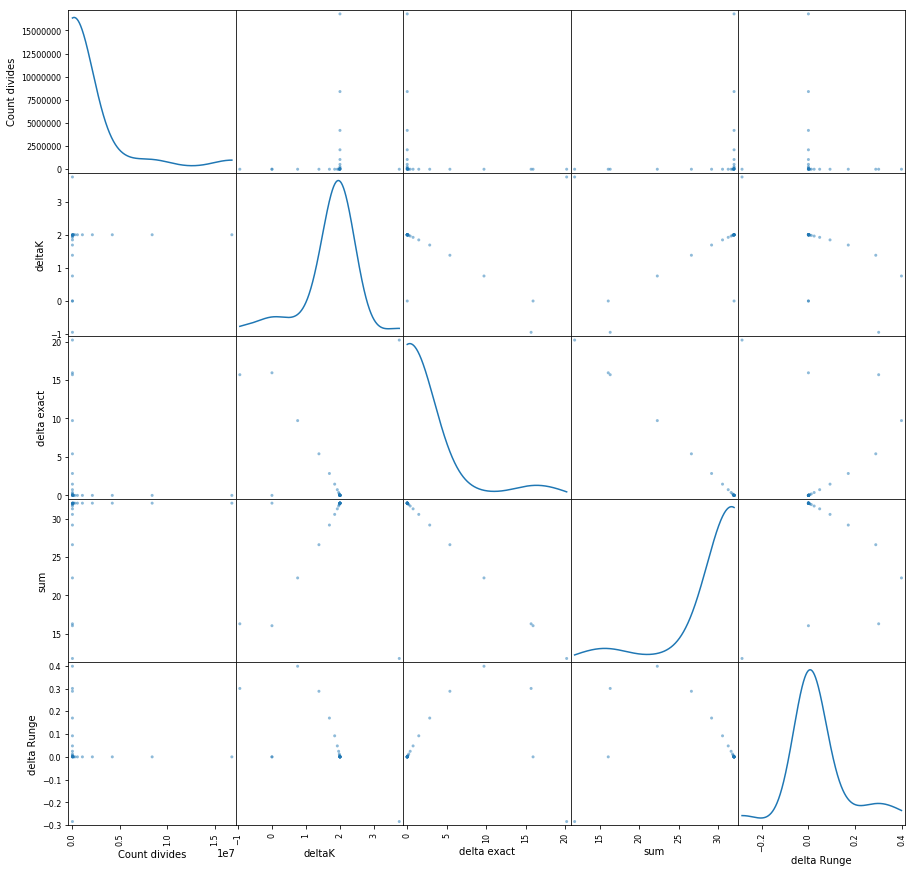

In [67]:
pd.plotting.scatter_matrix(df[['Count divides', 'deltaK', 'delta exact', 'sum', 'delta Runge']],
                  figsize=(15, 15), diagonal='kde')
plt.show()